### Problem 1 - Linear regression with StatsModels (12 pts)

Download the `Credit.csv` file that we used during the lecture. Make sure you include this data file in your submission package. 

Read the data into a pandas dataframe. Do the normal checking on the dataframe, drop the index column ("Unnamed: 0"), and then answer the following questions.

1. Generate a heatmap based on the correlation matrix for all pairs of features. Display the correlation coefficients on the heatmap. Change the color map to something different from the default. Hint: Google `matplotlib` `colormap`. 


2. Fit a regression model to predict the credit balance using income, credit limit, and credit rating. Print the result summary table. Check the colinearity of the predictors by obtaining the variance inflation factors (VIF) for the three predictors. What conclusions can you draw based on the VIF values?


3. Continue from Q2, now remove the credit limit predictor, and add the predictor indicating whether the individual is a student. Fit this new regression model to the data. What is the estimated coefficient for the "Student" predictor? What is the interpretation of this number? 


4. Continue from Q3, now add an interaction term for Income and Rating. Is this interaction effect significant at confidence level $\alpha = 0.05$? Briefly explain.


5. Based on the model in Q4, predict the balance for someone who has an income of $85k, credit rating of 550, and is not a student. For the prediction, provide the point estimate, the 95% confidence interval, and the 95% prediction interval. Briefly describe the  difference between the two intervals. 

### Data description:

**Income**: Income in thousands of dollors

**Limit**: Credit limit

**Rating**: Credit rating

**Cards**: Number of credit cards

**Age**: Age in years

**Education**: Number of years of education

**Gender**: A factor with levels Male and Female

**Student**: A factor with levels No and Yes indicating whether the individual was a student

**Married**: A factor with levels No and Yes indicating whether the individual was married

**Ethnicity**: A factor with levels African American, Asian, and Caucasian indicating the individual's ethnicity

**Balance**: Average credit card balance in $.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
from matplotlib.pyplot import rcParams

In [4]:
credit = pd.read_csv("C:\\Users\\Administrator\\Downloads\\credit.csv")

In [5]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
credit.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [24]:
credit = credit.drop(['Unnamed: 0'],axis=1)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
credit.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [25]:
corr = credit.corr()
corr.style.background_gradient(cmap='RdYlGn')

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1,0.792088,0.791378,-0.0182726,0.175338,-0.027692,0.463656
Limit,0.792088,1,0.99688,0.0102313,0.100888,-0.0235485,0.861697
Rating,0.791378,0.99688,1,0.053239,0.103165,-0.0301356,0.863625
Cards,-0.0182726,0.0102313,0.053239,1,0.0429483,-0.0510842,0.0864563
Age,0.175338,0.100888,0.103165,0.0429483,1,0.00361928,0.00183512
Education,-0.027692,-0.0235485,-0.0301356,-0.0510842,0.00361928,1,-0.00806158
Balance,0.463656,0.861697,0.863625,0.0864563,0.00183512,-0.00806158,1


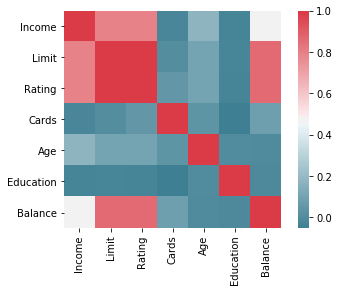

In [26]:
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [37]:
model='Balance ~ Income + Limit + Rating '
result=smf.ols(formula=model, data=credit).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Wed, 16 Oct 2019   Prob (F-statistic):          3.20e-179
Time:                        16:04:30   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -489.7275     32.099    -15.257      0.0

In [17]:
'''since there is a strong multicollinearity between the variables ,we are checking the VIF to cut down the variables'''

'since there is a strong multicollinearity between the variables ,we are checking the VIF to cut down the variables'

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
X = credit[['Income','Limit','Rating']]
Y = credit[['Balance']]

In [28]:
x= np.array(X)
X.values

array([[  14.891, 3606.   ,  283.   ],
       [ 106.025, 6645.   ,  483.   ],
       [ 104.593, 7075.   ,  514.   ],
       ...,
       [  57.872, 4171.   ,  321.   ],
       [  37.728, 2525.   ,  192.   ],
       [  18.701, 5524.   ,  415.   ]])

In [29]:
X.shape[1]

3

In [30]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [45]:
vif.round(1)

,VIF Factor,features
0,6.9,Income
1,378.6,Limit
2,357.0,Rating


In [16]:
'''limit and rating have a high variance inflation factor because they 
"explain" the same variance within this dataset. We would need to discard one of these variables before moving on to 
model building or risk building a model with high multicolinearity.'''


'limit and rating have a high variance inflation factor because they \n"explain" the same variance within this dataset. We would need to discard one of these variables before moving on to \nmodel building or risk building a model with high multicolinearity.'

In [31]:
from sklearn.preprocessing import LabelEncoder

In [37]:
obj = LabelEncoder()
credit['StudentEncoded'] = obj.fit_transform(credit['Student'])
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student Encoded,StudentEncoded
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0


In [38]:
model2='Balance ~ Income + StudentEncoded + Rating '
result=smf.ols(formula=model2, data=credit).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          6.23e-257
Time:                        18:13:49   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -581.0789     13.835    -42.

In [ ]:
the value of r2 squared has increased to 0.950 , indicating its better than the previous model , now lets check the correlation
between them

In [40]:
credit=credit.drop(['Student Encoded'],axis=1)

In [82]:
corr = credit.corr()
corr.style.background_gradient(cmap='RdYlGn')

,Income,Limit,Rating,Cards,Age,Education,Balance,StudentEncoded
Income,1,0.792088,0.791378,-0.0182726,0.175338,-0.027692,0.463656,0.0196321
Limit,0.792088,1,0.99688,0.0102313,0.100888,-0.0235485,0.861697,-0.00601509
Rating,0.791378,0.99688,1,0.053239,0.103165,-0.0301356,0.863625,-0.00202765
Cards,-0.0182726,0.0102313,0.053239,1,0.0429483,-0.0510842,0.0864563,-0.0261641
Age,0.175338,0.100888,0.103165,0.0429483,1,0.00361928,0.00183512,-0.0298444
Education,-0.027692,-0.0235485,-0.0301356,-0.0510842,0.00361928,1,-0.00806158,0.0720854
Balance,0.463656,0.861697,0.863625,0.0864563,0.00183512,-0.00806158,1,0.259018
StudentEncoded,0.0196321,-0.00601509,-0.00202765,-0.0261641,-0.0298444,0.0720854,0.259018,1


In [46]:
X2 = credit[['Income','StudentEncoded','Rating']]
Y2 = credit[['Balance']]

In [48]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.round(1)

,VIF Factor,features
0,6.3,Income
1,1.1,StudentEncoded
2,6.4,Rating


In [49]:
'''the coefficent of student predictor is 418.76'''

'the coefficent of student predictor is 418.76'

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x3 = credit[['Income','Rating']]
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(x3)

In [52]:
X_inter

array([[1.4891000e+01, 2.8300000e+02, 4.2141530e+03],
       [1.0602500e+02, 4.8300000e+02, 5.1210075e+04],
       [1.0459300e+02, 5.1400000e+02, 5.3760802e+04],
       ...,
       [5.7872000e+01, 3.2100000e+02, 1.8576912e+04],
       [3.7728000e+01, 1.9200000e+02, 7.2437760e+03],
       [1.8701000e+01, 4.1500000e+02, 7.7609150e+03]])

In [74]:
X3 = pd.DataFrame(X_inter,columns = ['Income','Rating','InteractionRI'])
X3['Student'] = credit['StudentEncoded']

In [75]:
Y3 = credit[['Balance']]

In [76]:
new_df = X3.copy()
new_df['Balance'] = credit['Balance']
new_df.head()

,Income,Rating,InteractionRI,Student,Balance
0,14.891,283.0,4214.153,0,333
1,106.025,483.0,51210.075,1,903
2,104.593,514.0,53760.802,0,580
3,148.924,681.0,101417.244,0,964
4,55.882,357.0,19949.874,0,331


In [77]:
model3='Balance ~ Income + Student + Rating + InteractionRI '
result=smf.ols(formula=model3, data=new_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2002.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          1.04e-260
Time:                        21:35:33   Log-Likelihood:                -2407.8
No. Observations:                 400   AIC:                             4826.
Df Residuals:                     395   BIC:                             4846.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -500.3213     20.705    -24.165

In [ ]:
the pvalue of interactionRI is less than 0.05 ,hence we reject the hypothesis

In [66]:
x_values = pd.DataFrame([[85,550,46750,0]],columns=['Income','Rating','InteractionRI','Student'])

In [67]:
x_values

,Income,Rating,InteractionRI,Student
0,85,550,46750,0


In [69]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()
reg.fit(X3,Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
prediction = reg.predict(x_values)

In [81]:
prediction

array([[923.29991006]])